# Convolutional Neural Network (CNN)


Convolutional Neural Networks (CNNs) are a class of deep neural networks commonly used in `image recognition` and `processing`. When discussing CNNs, several key terms and concepts come into play:

 - **Convolutional Layer:** This layer applies convolutional operations to the input, producing feature maps. It is the core building block of a CNN.
    - **Convolutional Operation:** This operation involves a `kernel` (or `filter`) that is passed over the input data, performing element-wise multiplication with the part of the input it is currently `focused` on. The result is a single value in the output feature map.


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

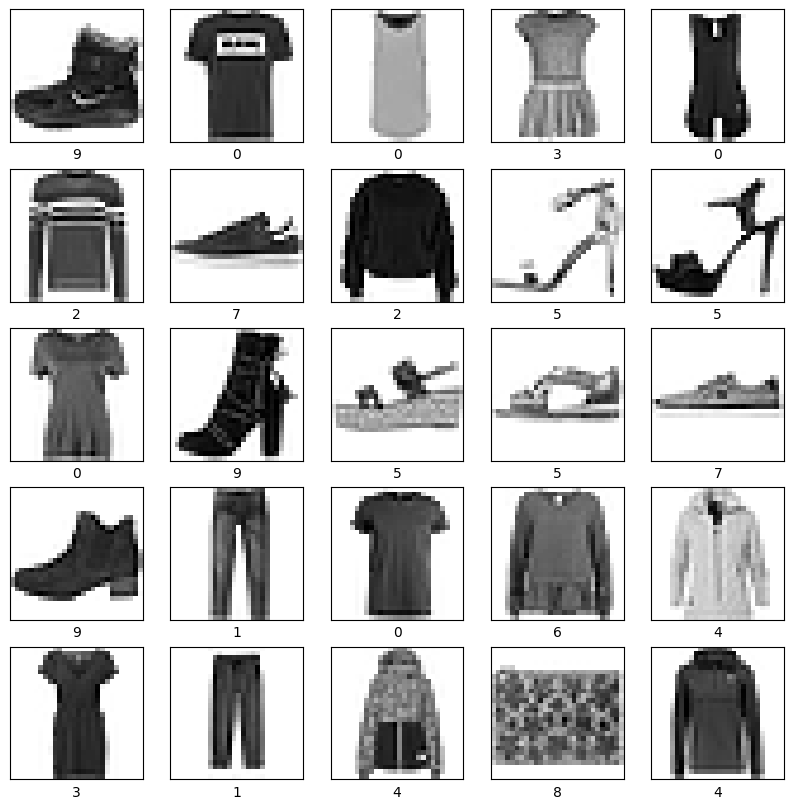

In [23]:
# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [24]:
# explore the data
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")
print(f"The size of the images is {X_train[0].shape}.")

We have 60000 images in the training set and 10000 images in the test set.
The size of the images is (28, 28).


In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
y_train.shape

(60000,)

In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [28]:
60000-1

59999

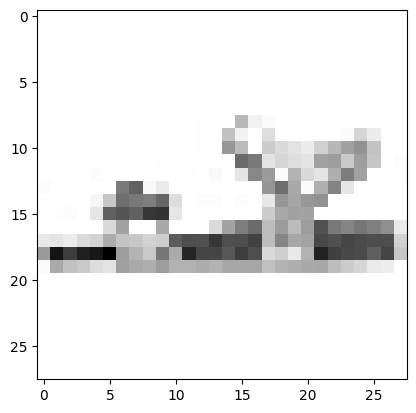

In [29]:
plt.imshow(X_train[59999], cmap=plt.cm.binary)

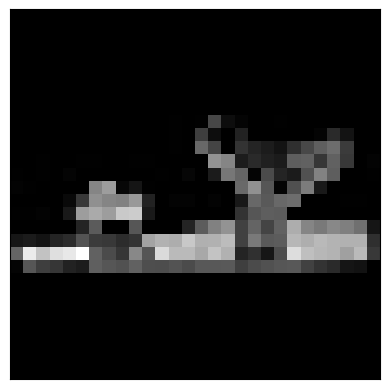

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   1  71  13   4   0   0   

In [30]:
# Display the first image in the dataset as a data matrix
plt.imshow(X_train[59999], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[59999]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [31]:
# also need to change the data type to float32 Data Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [32]:
# Display the values of each pixel in the image after normalization
print("\nPixel values after normalization:")
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()



Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.004 0.000 0.000 0.051 0.286 0.000 0.000 0.004 0.016 0.000 0.000 0.000 0.000 0.004 0.004 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.000 0.141 0.533 0.498 0.243 0.212 0.000 0.000 0.000 0.004 0.012 0.016 0.000 0.000 0.012 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.024 0.000 0.400 0.800 0.690 0.525 0.565 0.482 

# Build the model

In [33]:
# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with a single color channel

# CNN model building

model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6862 - loss: 0.8779 - val_accuracy: 0.8301 - val_loss: 0.4725
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8428 - loss: 0.4318 - val_accuracy: 0.8621 - val_loss: 0.3908
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8671 - loss: 0.3679 - val_accuracy: 0.8654 - val_loss: 0.3657
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8806 - loss: 0.3352 - val_accuracy: 0.8709 - val_loss: 0.3624
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8862 - loss: 0.3154 - val_accuracy: 0.8815 - val_loss: 0.3342
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8917 - loss: 0.3014 - val_accuracy: 0.8751 - val_loss: 0.3404
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8957 - loss: 0.2882 - val_accuracy: 0.8799 - val_loss: 0.3191
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9008 -

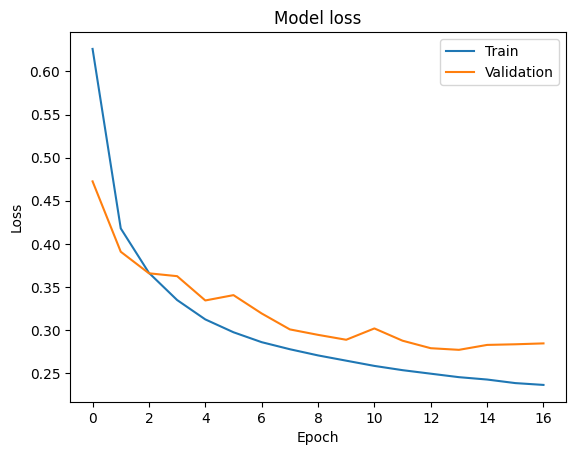

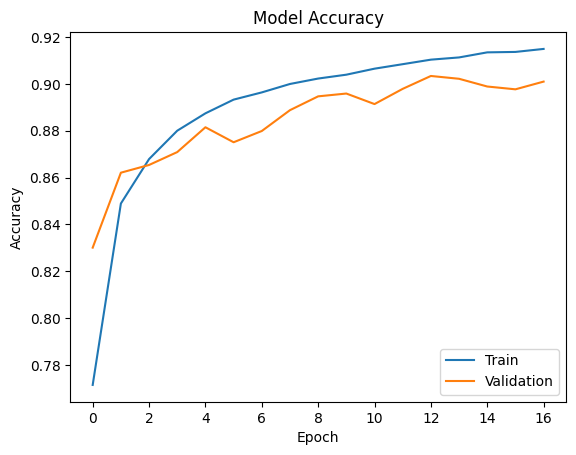

CPU times: total: 2min 51s
Wall time: 4min 4s


In [36]:
%%time
# Define the callback function
early_stopping = EarlyStopping(patience=3)

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [37]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8994 - loss: 0.2939
Test Loss: 0.2843935191631317
Test Accuracy: 0.9010000228881836


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion Matrix:
[[898   0  18  21   4   1  49   0   9   0]
 [  2 979   0  17   1   0   0   0   1   0]
 [ 17   2 921   8  30   0  20   0   2   0]
 [ 28   1  19 897  29   0  23   0   3   0]
 [  3   2  64  26 863   0  41   0   1   0]
 [  0   0   0   0   0 969   1  16   4  10]
 [189   1  94  32  89   0 583   0  12   0]
 [  0   0   0   0   0   9   0 977   0  14]
 [  5   2   5   6   2   1   2   2 974   1]
 [  1   0   0   0   0   4   0  45   1 949]]

Normalized Confusion Matrix:
[[0.898 0.    0.018 0.021 0.004 0.001 0.049 0.    0.009 0.   ]
 [0.002 0.979 0.    0.017 0.001 0.    0.    0.    0.001 0.   ]
 [0.017 0.002 0.921 0.008 0.03  0.    0.02  0.    0.002 0.   ]
 [0.028 0.001 0.019 0.897 0.029 0.    0.023 0.    0.003 0.   ]
 [0.003 0.002 0.064 0.026 0.863 0.    0.041 0.    0.001 0.   ]
 [0.    0.    0.    0.    0.    0.969 0.001 0.016 0.004 0.01 ]
 [0.189 0.001 0.094 0.032 0.089 0.    0.583 0.    0.012 0.   ]
 [0.    0.    0.    0.    0.    0.009 0

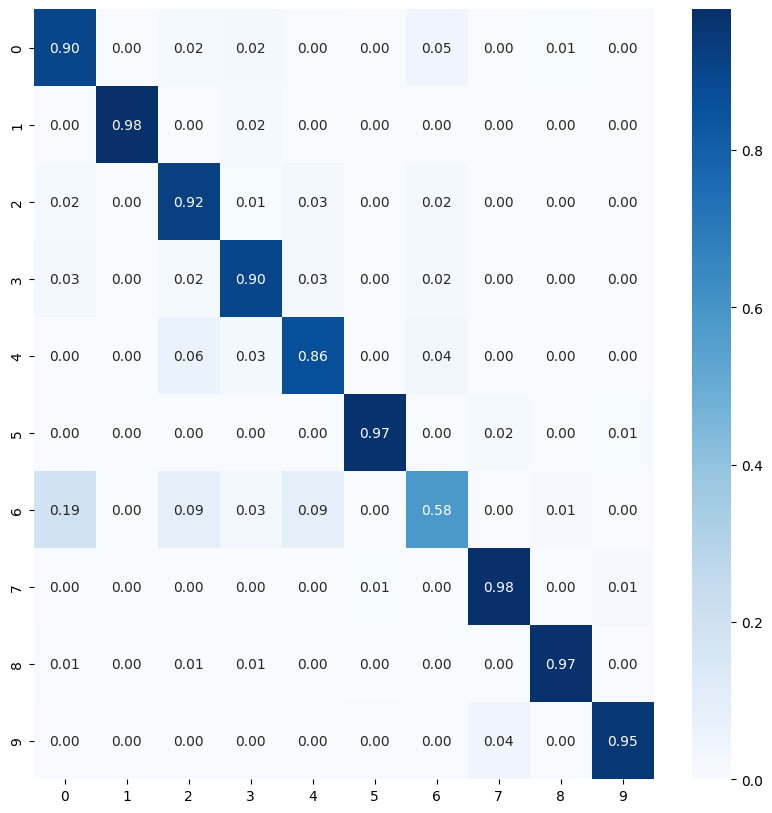

In [44]:
# draw the confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix

cm = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Normalize the confusion matrix

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("\nNormalized Confusion Matrix:")
print(cm)

# Plot the confusion matrix

import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [38]:
# Save the model to be used later
model.save('models_saved/fashion_mnist_cnn.h5')

# Predicting an image

(28, 28)
(28, 28, 1)


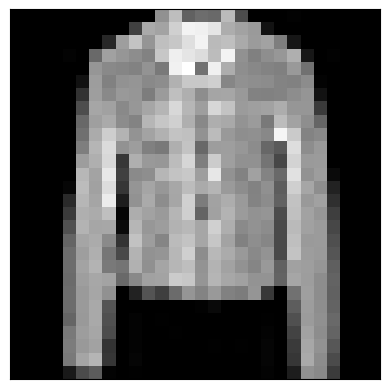

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
The model predicts that this image is a 4.


In [ ]:
# grab an image
img = X_test[10]
print(img.shape)
# # rehape the image to (28, 28, 1)
img = img.reshape((28, 28, 1))
print(img.shape)
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()
# predict the image
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(f"The model predicts that this image is a {predictions.argmax()}.")